In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font', family = 'Malgun Gothic')

In [2]:
df_ROS = pd.read_csv('../../datasets/RecurrenceOfSurgery.csv')
df_ROS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1744 entries, 0 to 1743
Data columns (total 51 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0.2            1744 non-null   int64  
 1   Unnamed: 0.1            1744 non-null   int64  
 2   Unnamed: 0              1744 non-null   int64  
 3   환자ID                    1744 non-null   object 
 4   Large Lymphocyte        1744 non-null   float64
 5   Location of herniation  1744 non-null   int64  
 6   가족력                     1744 non-null   float64
 7   간질성폐질환                  1744 non-null   int64  
 8   고혈압여부                   1744 non-null   int64  
 9   과거수술횟수                  1744 non-null   int64  
 10  당뇨여부                    1744 non-null   int64  
 11  말초동맥질환여부                1744 non-null   int64  
 12  빈혈여부                    1744 non-null   int64  
 13  성별                      1744 non-null   int64  
 14  스테로이드치료                 1744 non-null   

### 상관관계 확인

- 목표변수 : '입원기간'

- 설명변수:
   - 종양진행여부
   - 혈전합병증여부
   - 신장
   - 체중
   - 수술기법
   - 재발여부

In [3]:
df_ROS_AP = df_ROS[['신장','체중','종양진행여부','혈전합병증여부','수술기법','재발여부','입원기간']]
df_ROS_AP

,신장,체중,종양진행여부,혈전합병증여부,수술기법,재발여부,입원기간
0,163,60.3,0,0,TELD,0,2
1,171,71.7,0,0,TELD,0,1
2,178,77.1,0,0,TELD,0,1
3,174,74.2,0,0,TELD,0,1
4,183,80.7,0,0,TELD,0,2
...,...,...,...,...,...,...,...
1739,163,52.0,0,0,TELD,0,12
1740,185,64.0,0,0,TELD,0,2
1741,160,60.0,0,0,TELD,0,3
1742,173,70.0,0,0,TELD,0,3


In [43]:
# 체중과 신장으로 BMI 구하기
# BMI = 체중(kg) / (신장(m) * 신장(m))
df_ROS_BMI = df_ROS_AP[['신장','체중']]
df_ROS_BMI[:10]

,신장,체중
0,163,60.3
1,171,71.7
2,178,77.1
3,174,74.2
4,183,80.7
5,164,60.8
6,175,74.8
7,183,81.2
8,168,69.2
9,160,63.0


In [44]:
df_ROS_BMI.describe()

,신장,체중
count,1744.000000,1744.000000
mean,168.047592,68.101319
std,9.160551,10.958112
min,140.000000,35.000000
25%,161.000000,59.800000
50%,169.000000,68.000000
75%,175.000000,75.000000
max,204.000000,114.000000


In [6]:
df_ROS_BMI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1744 entries, 0 to 1743
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   신장      1744 non-null   int64  
 1   체중      1744 non-null   float64
 2   입원기간    1744 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 41.0 KB


In [7]:
# BMI 계산 함수, 신장 int -> float으로 Type casting
def Calculate_BMI(row):
    height = float(row['신장']) / 100 
    weight = float(row['체중'])
    BMI = weight / (height * height)
    return BMI

In [8]:
# BMI 계산 및 범주 할당
df_ROS_BMI['BMI'] = df_ROS_BMI.apply(Calculate_BMI, axis=1)
df_ROS_BMI['BMI']

C:\Users\04-02\AppData\Local\Temp\ipykernel_13544\4136818685.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ROS_BMI['BMI'] = df_ROS_BMI.apply(Calculate_BMI, axis=1)


0       22.695623
1       24.520365
2       24.334049
3       24.507861
4       24.097465
          ...    
1739    19.571681
1740    18.699781
1741    23.437500
1742    23.388687
1743    25.099502
Name: BMI, Length: 1744, dtype: float64

In [9]:
pd.pivot_table(data=df_ROS_BMI[['BMI', '입원기간']], index='BMI', aggfunc=len)

,입원기간
BMI,
14.479500,1
16.127207,1
16.906171,2
17.224804,2
17.361111,1
...,...
34.193213,2
34.220041,1
34.492232,1


<Axes: xlabel='BMI'>

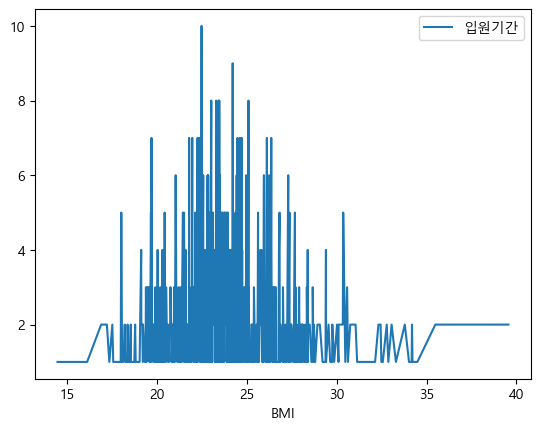

In [10]:
pd.pivot_table(data=df_ROS_BMI[['BMI', '입원기간']], index='BMI', aggfunc=len).plot(kind='line')

In [11]:
df_ROS_BMI['BMI_범주'] = pd.cut(df_ROS_BMI['BMI'], bins=[0, 18.5, 24.9, 29.9, float('inf')],
                               labels=['저체중', '정상 체중', '과체중', '비만'])

C:\Users\04-02\AppData\Local\Temp\ipykernel_13544\3414255278.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ROS_BMI['BMI_범주'] = pd.cut(df_ROS_BMI['BMI'], bins=[0, 18.5, 24.9, 29.9, float('inf')],


In [12]:
# BMI 범주별 빈도수 계산
df_ROS_BMI_counts = df_ROS_BMI['BMI_범주'].value_counts()
df_ROS_BMI_counts

정상 체중    1265
과체중       389
비만         56
저체중        34
Name: BMI_범주, dtype: int64

In [13]:
df_ROS_ad = df_ROS[['입원일자', '입원기간','퇴원일자']]
df_ROS_AP_subset = df_ROS_ad[['입원일자','퇴원일자', '입원기간']]
df_ROS_AP_subset['BMI_범주'] = df_ROS_BMI['BMI_범주']
df_ROS_AP_subset

C:\Users\04-02\AppData\Local\Temp\ipykernel_13544\707784013.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ROS_AP_subset['BMI_범주'] = df_ROS_BMI['BMI_범주']


,입원일자,퇴원일자,입원기간,BMI_범주
0,20190713,20190716,2,정상 체중
1,20190715,20190716,1,정상 체중
2,20190729,20190801,1,정상 체중
3,20190731,20190803,1,정상 체중
4,20190903,20190907,2,정상 체중
...,...,...,...,...
1739,20170302,20170313,12,정상 체중
1740,20170316,20170317,2,정상 체중
1741,20170928,20170930,3,정상 체중
1742,20170604,20170606,3,정상 체중


#### 6. BMI범주 여부와 입원기간

In [14]:
df_BMI= df_ROS_AP_subset[['BMI_범주', '입원기간', '입원일자', '퇴원일자']]
df_BMI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1744 entries, 0 to 1743
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   BMI_범주  1744 non-null   category
 1   입원기간    1744 non-null   int64   
 2   입원일자    1744 non-null   int64   
 3   퇴원일자    1744 non-null   int64   
dtypes: category(1), int64(3)
memory usage: 42.9 KB


In [41]:
# 입원기간 이상치 제거
df_Ba = df_BMI['입원기간'].describe()['25%']
df_Bb = df_BMI['입원기간'].describe()['75%']
df_Ba_IQR = df_Bb - df_Ba

In [42]:
df_Ba, df_Bb, df_Ba_IQR

(1.0, 2.0, 1.0)

In [18]:
df_Ba_up = df_Bb + 1.5 * df_Ba_IQR
df_Ba_down = df_Ba - 1.5 * df_Ba_IQR

In [19]:
df_Ba_up, df_Ba_down

(3.5, -0.5)

In [20]:
df_B_condition = (df_BMI['입원기간'] <= df_Ba_up) & (df_BMI['입원기간'] >= df_Ba_down)
df_ROS = df_ROS[df_B_condition]
# 전체 리스트에서 입원기간의 이상치를 제거함
df_BMI =  df_BMI[df_B_condition]

In [21]:
df_BMI.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1684 entries, 0 to 1743
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   BMI_범주  1684 non-null   category
 1   입원기간    1684 non-null   int32   
 2   입원일자    1684 non-null   int64   
 3   퇴원일자    1684 non-null   int64   
dtypes: category(1), int32(1), int64(2)
memory usage: 47.9 KB


In [22]:
df_BMI.pivot_table(index='BMI_범주', values='입원기간', aggfunc=np.mean)

,입원기간
BMI_범주,
저체중,1.333333
정상 체중,1.454251
과체중,1.449591
비만,1.538462


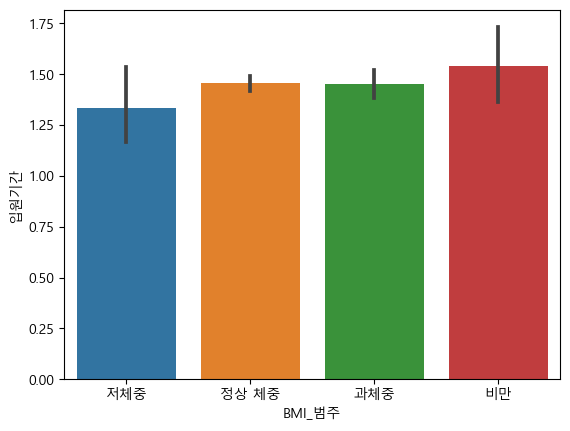

In [45]:
df_BMI_chart = sns.barplot(data=df_BMI, x='BMI_범주', y='입원기간')

#### 따라서 BMI범주 비만일수록 입원기간이 더 길었다. 

#### 7. 종양진행여부와 입원기간

In [24]:
df_Tumor = df_ROS[['종양진행여부', '입원기간']]
df_Tumor.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1684 entries, 0 to 1743
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   종양진행여부  1684 non-null   int64
 1   입원기간    1684 non-null   int64
dtypes: int64(2)
memory usage: 39.5 KB


In [26]:
df_Tumor.pivot_table(index='종양진행여부', values='입원기간', aggfunc=np.mean)

,입원기간
종양진행여부,
0,1.452055
1,2.000000


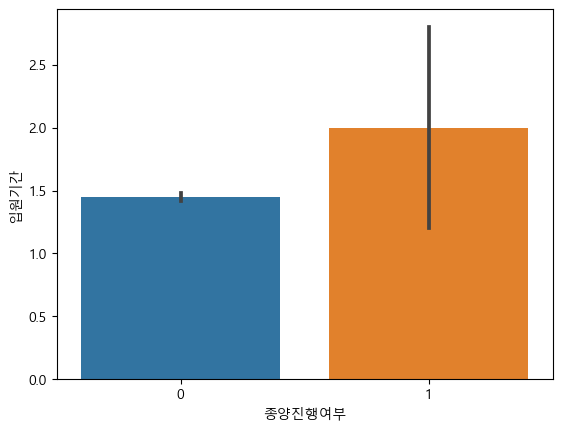

In [28]:
df_Tumor_chart = sns.barplot(data=df_Tumor, x='종양진행여부', y='입원기간')

##### 따라서, 종양진행여부가 있는 환자의 평균 입원기간이 더 길었다.

#### 8. 혈전합병증여부와 입원기간

In [31]:
df_thrombus = df_ROS[['혈전합병증여부', '입원기간']]
df_thrombus.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1684 entries, 0 to 1743
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   혈전합병증여부  1684 non-null   int64
 1   입원기간     1684 non-null   int64
dtypes: int64(2)
memory usage: 39.5 KB


In [32]:
df_thrombus.pivot_table(index='혈전합병증여부', values='입원기간', aggfunc=np.mean)

,입원기간
혈전합병증여부,
0,1.453571
1,1.500000


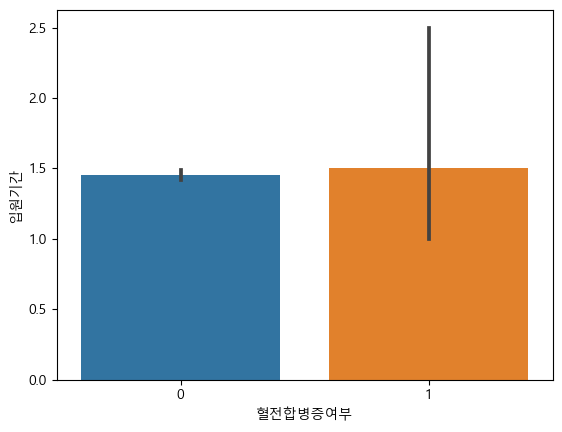

In [33]:
df_thrombus_chart = sns.barplot(data=df_thrombus, x='혈전합병증여부', y='입원기간')

##### 따라서, 혈전합병증이 있는 환자의 평균 입원기간이 조금 더 길었다.

#### 9. 수술기법과 입원기간

In [35]:
df_surgicaltechnique = df_ROS[['수술기법', '입원기간']]
df_surgicaltechnique

,수술기법,입원기간
0,TELD,2
1,TELD,1
2,TELD,1
3,TELD,1
4,TELD,2
...,...,...
1738,IELD,2
1740,TELD,2
1741,TELD,3
1742,TELD,3


In [36]:
df_surgicaltechnique.pivot_table(index='수술기법', values='입원기간', aggfunc=np.mean)

,입원기간
수술기법,
IELD,1.503937
TELD,1.449583


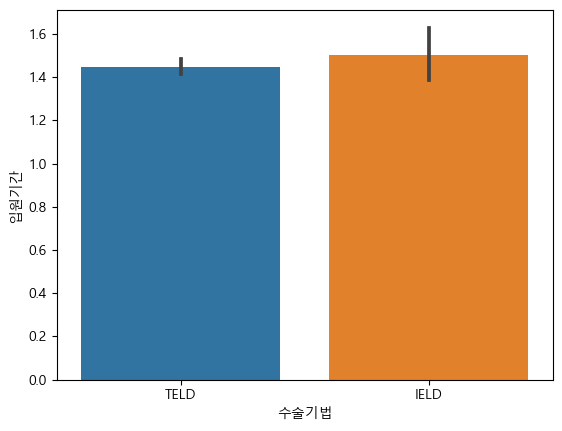

In [37]:
df_surgicaltechnique_chart = sns.barplot(data=df_surgicaltechnique, x='수술기법', y='입원기간')

##### 따라서, IELD으로 수술한 환자의 평균 입원기간이 조금 더 길었다.
###### 수술방법 
###### Interlaminar Endoscopic Lumbar Disectomy IELD  층간 내시경 요추 추간판 절제술
###### Transforaminal Endoscopic Lumbar Disectomy TELD 추간공 내시경적 요추 추간판 절제술

#### 10. 재발여부와 입원기간

In [38]:
df_recurrence = df_ROS[['재발여부', '입원기간']]
df_recurrence

,재발여부,입원기간
0,0,2
1,0,1
2,0,1
3,0,1
4,0,2
...,...,...
1738,1,2
1740,0,2
1741,0,3
1742,0,3


In [39]:
df_recurrence.pivot_table(index='재발여부', values='입원기간', aggfunc=np.mean)

,입원기간
재발여부,
0,1.458697
1,1.415385


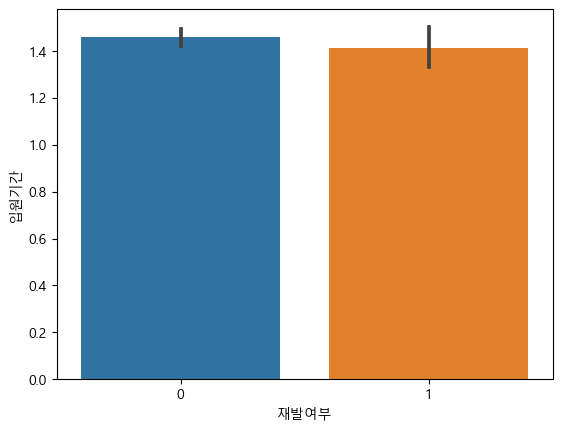

In [40]:
df_recurrence_chart = sns.barplot(data=df_recurrence, x='재발여부', y='입원기간')

##### 따라서, 재발여부 없을 경우 평균 입원기간이 조금 더 길었다.